In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR, SVC

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

/home/maebee/.pyenv/versions/lewagon/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv(os.path.join('data', 'player_pairs_stats.csv'))
df.drop_duplicates(subset=['match_id'], inplace=True)
df

,match_id,player,player_deaths_per_min,player_assists_per_min,player_tower_damage,player_xp_per_min,player_gold_per_min,player_net_worth,player_kills_per_min,player_hero_damage,...,opponent_xp_per_min,opponent_gold_per_min,opponent_net_worth,opponent_kills_per_min,opponent_hero_damage,opponent_last_hits,opponent_hero_id,opponent_roshans_killed,opponent_obs_placed,winner
0,6880924102,767434930,0.005068,0.008616,243,530,381,12019,0.003548,15961,...,558,453,13757,0.002027,12523,216,42,0.0,0.0,767434930
1,6880924214,153110997,0.009366,0.002755,861,394,269,6678,0.001653,10518,...,810,555,16532,0.005510,15334,227,44,0.0,0.0,1121170451
2,6880924314,118839691,0.002921,0.003895,102,361,369,6440,0.000000,3073,...,253,278,4919,0.000974,6766,19,119,0.0,0.0,437601765
3,6880924403,124272893,0.003254,0.002169,70,671,388,10066,0.002711,9104,...,496,326,8841,0.002711,11215,62,51,0.0,0.0,233422854
4,6880924409,147428574,0.005543,0.004989,262,486,463,11465,0.001109,22946,...,422,314,8097,0.000554,10193,31,87,0.0,0.0,292686154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,6882526312,209521221,0.005394,0.000674,0,296,240,5213,0.000674,3279,...,455,364,8389,0.004720,13284,57,25,0.0,0.0,275868212
7787,6882531210,149338363,0.003709,0.011869,68,371,243,4923,0.002226,5885,...,257,226,3905,0.000742,6862,50,36,0.0,0.0,149338363
7788,6882541503,436911654,0.001385,0.004155,295,343,535,6579,0.005540,6297,...,223,428,4758,0.000000,4072,12,9,0.0,0.0,436911654
7789,6882541917,461384275,0.001927,0.005780,0,176,214,2389,0.000000,514,...,433,496,4983,0.005780,1919,35,41,0.0,0.0,136365412


In [3]:
for row in range(len(df)):
    if df['player'][row] == df['winner'][row]:
        df['winner'][row] = 1
    else:
        df['winner'][row] = 0
df

/tmp/ipykernel_6143/1772519859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'][row] = 1
/tmp/ipykernel_6143/1772519859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'][row] = 0


,match_id,player,player_deaths_per_min,player_assists_per_min,player_tower_damage,player_xp_per_min,player_gold_per_min,player_net_worth,player_kills_per_min,player_hero_damage,...,opponent_xp_per_min,opponent_gold_per_min,opponent_net_worth,opponent_kills_per_min,opponent_hero_damage,opponent_last_hits,opponent_hero_id,opponent_roshans_killed,opponent_obs_placed,winner
0,6880924102,767434930,0.005068,0.008616,243,530,381,12019,0.003548,15961,...,558,453,13757,0.002027,12523,216,42,0.0,0.0,1
1,6880924214,153110997,0.009366,0.002755,861,394,269,6678,0.001653,10518,...,810,555,16532,0.005510,15334,227,44,0.0,0.0,0
2,6880924314,118839691,0.002921,0.003895,102,361,369,6440,0.000000,3073,...,253,278,4919,0.000974,6766,19,119,0.0,0.0,0
3,6880924403,124272893,0.003254,0.002169,70,671,388,10066,0.002711,9104,...,496,326,8841,0.002711,11215,62,51,0.0,0.0,0
4,6880924409,147428574,0.005543,0.004989,262,486,463,11465,0.001109,22946,...,422,314,8097,0.000554,10193,31,87,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,6882526312,209521221,0.005394,0.000674,0,296,240,5213,0.000674,3279,...,455,364,8389,0.004720,13284,57,25,0.0,0.0,0
7787,6882531210,149338363,0.003709,0.011869,68,371,243,4923,0.002226,5885,...,257,226,3905,0.000742,6862,50,36,0.0,0.0,1
7788,6882541503,436911654,0.001385,0.004155,295,343,535,6579,0.005540,6297,...,223,428,4758,0.000000,4072,12,9,0.0,0.0,1
7789,6882541917,461384275,0.001927,0.005780,0,176,214,2389,0.000000,514,...,433,496,4983,0.005780,1919,35,41,0.0,0.0,0


In [4]:
X = df.drop(columns=['match_id', 'player', 'player_hero_id', 'opponent', 'opponent_hero_id', 'winner'])
y = df['winner']

In [5]:
y_log = np.log(y)

/home/maebee/.pyenv/versions/lewagon/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [7]:
xgb = XGBRegressor(max_depth=10, n_estimators=50, learning_rate=0.1)

In [8]:
xgb.fit(X_train, y_train,
        verbose=False,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric=['rmse'],
        early_stopping_rounds=10)

/home/maebee/.pyenv/versions/lewagon/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [9]:
results = xgb.evals_result()
min(results['validation_0']['rmse'])

0.011586

Text(0.5, 1.0, 'XGBoost Log Loss')

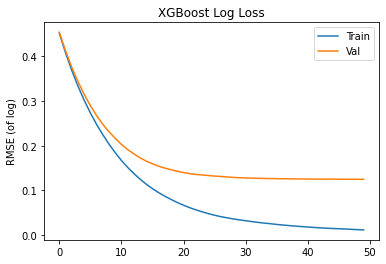

In [51]:
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

In [4]:
gb_model = GradientBoostingRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

In [5]:
gb_model.fit(X_train, y_train,
            verbose=False,
            eval_set=[(X_train, y_train), (X_val, y_val)],
            eval_metric=['rmse'],
            early_stopping_rounds=10)

NameError: name 'X_train' is not defined

In [ ]:
results_gb = xgb.evals_result()
min(results_gb['validation_0']['rmse'])